# Создай инструменты аналитики и автоматизации для DevRel задач (DevRel Hack)

### DevRel — специалист по техническому пиару и коммуникации между конкретной компанией и IT-сообществом. Проще говоря, DevRel — ваш представитель и пиарщик в среде таких же технарей.
Для успешной работы с  IT-сообществом необходимо обладать информацией о его составе, интересах и тд.
Вам необходимо создать систему анализирующую состав сообщества в github.
Результатом должен быть веб сервис, который позволяет просматривать и фильтровать аудиторию сообщества, выгружать ее в excel.
Рекомендуемый состав команды: аналитик, продукт менеджер, дизайнер, бэкенд и фронтенд разработчики.

In [1]:
import seaborn as sns # Выгружаем библиотеки
sns.set(font_scale=1.5) 
import matplotlib.pyplot as plt # Импортируем модуль matplotlib.pyplot
import re # Импортируем модуль re
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
import pandas as pd # Импортируем модуль pandas
import numpy as np

### Посмотрим на данные, полученные с GitHub. Для исследования данные взяты по сообществу Node.js

In [2]:
with open("nodeJsUsers.json", encoding='utf-8', newline='') as f:  # Открываем файл и связываем его с объектом "f"
    data = json.load(f)  # Загружаем содержимое открытого файла в переменную news

df = pd.json_normalize(data, 'items')
df.head(5) # Отобразим получившиеся данные

,name,langs,stars,commits,prs,issues,contribs
0,cjihrig,"[JavaScript, C, C++, CSS, HTML]",654.0,261.0,1700.0,454.0,22.0
1,jeffwhelpley,"[JavaScript, CSS, HTML, TypeScript, Shell]",46.0,0.0,58.0,85.0,0.0
2,aleksraiden,"[PHP, C++, C, JavaScript, CMake]",21.0,22.0,56.0,75.0,9.0
3,hunslater,"[C, Python, C++, JavaScript, PHP]",14.0,0.0,7.0,0.0,0.0
4,medikoo,"[JavaScript, Emacs Lisp, HTML, CSS, Smarty]",4700.0,1800.0,1700.0,892.0,28.0


In [3]:
contributors = df['name'].nunique()
print("Количество участников в сообществе:", contributors)

Количество участников в сообществе: 2890


### Посмотрим на основные статистические свойства столбцов:

In [4]:
df.describe()

,stars,commits,prs,issues,contribs
count,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000
mean,60.330339,68.258466,26.463718,19.053214,1.168279
std,677.336507,2017.612975,176.561925,119.278062,7.794657
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000
75%,7.000000,2.000000,5.000000,6.000000,0.000000
max,25000.000000,107700.000000,5300.000000,2900.000000,285.000000


In [5]:
### Для наглядности построим диаграммы по полученным данным

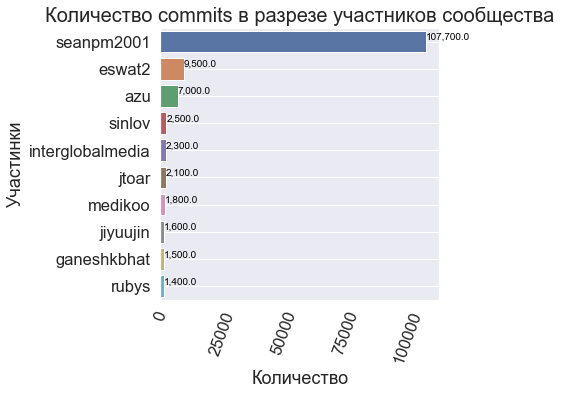

In [6]:
df_commits = df.sort_values('commits', ascending=False).head(10)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
barplot = sns.barplot(
    data=df_commits,
    x='commits',
    y='name'
)
barplot.tick_params(axis='x', rotation=70);
barplot.set_title('Количество commits в разрезе участников сообщества', fontsize=20);
barplot.set_xlabel('Количество', fontsize=18);
barplot.set_ylabel('Участинки', fontsize=18);
barplot.grid()

for i, v in enumerate(df_commits["commits"].iteritems()):        
    axes.text(s = "{:,}".format(v[1]), x = v[1], y = i, verticalalignment="top",color='black', va ='bottom', rotation=0)


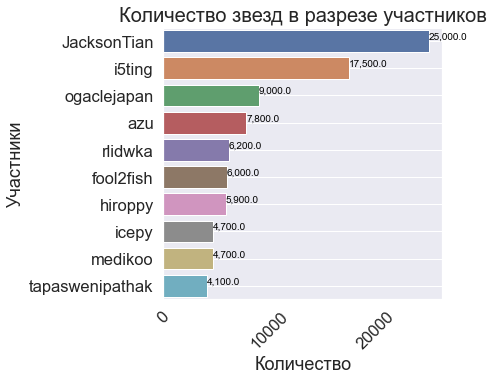

In [7]:
df_stars = df.sort_values('stars', ascending=False).head(10)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
barplot = sns.barplot(
    data=df_stars,
    x='stars',
    y='name'
)
barplot.tick_params(axis='x', rotation=45);
barplot.set_title('Количество звезд в разрезе участников', fontsize=20);
barplot.set_xlabel('Количество', fontsize=18);
barplot.set_ylabel('Участники', fontsize=18);
barplot.grid()

for i, v in enumerate(df_stars["stars"].iteritems()):        
    axes.text(s = "{:,}".format(v[1]), x = v[1], y = i, verticalalignment="top",color='black', va ='bottom', rotation=0)

### По количеству звезд можно разделить участников на Джунов, Мидлов и Сеньоров, используя статистические данные. Например, по 25-й квантили: у кого нет звезд - это Джуны. К Сеньорам относятся, у кого количество звезд больше, чем 75-я квантиль, т.е. больше 7-ти звезд - это Сеньоры. Середина осталась для Миддлов - от 1-го до 7-ти включительно.

### Посмотрим какие языки программирования преобладают у участников исследуемого сообщества:

In [8]:
table=df.explode('langs')
table

,name,langs,stars,commits,prs,issues,contribs
0,cjihrig,JavaScript,654.0,261.0,1700.0,454.0,22.0
0,cjihrig,C,654.0,261.0,1700.0,454.0,22.0
0,cjihrig,C++,654.0,261.0,1700.0,454.0,22.0
0,cjihrig,CSS,654.0,261.0,1700.0,454.0,22.0
0,cjihrig,HTML,654.0,261.0,1700.0,454.0,22.0
...,...,...,...,...,...,...,...
2893,Cabotrez,CSS,4.0,4.0,0.0,0.0,0.0
2893,Cabotrez,HTML,4.0,4.0,0.0,0.0,0.0
2893,Cabotrez,PHP,4.0,4.0,0.0,0.0,0.0
2893,Cabotrez,Makefile,4.0,4.0,0.0,0.0,0.0


### Построим по полученным данным круговую диаграмму по Языкам программирования среди участинков сообщества:

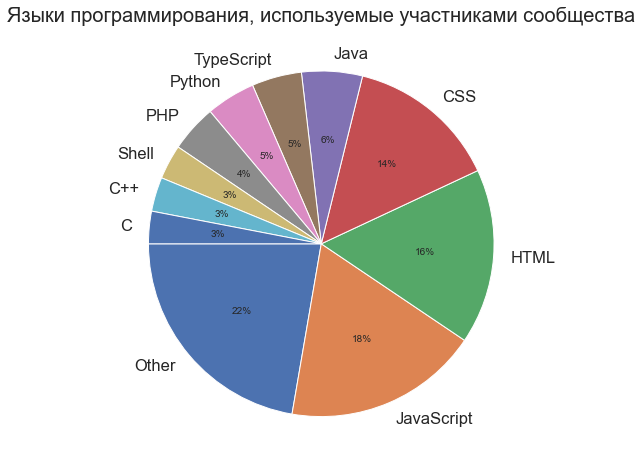

In [9]:
df_langs = table.copy().drop(['stars', 'commits', 'prs', 'issues', 'contribs'], axis = 1)

langs = df_langs.groupby(['langs'])['name'].nunique().reset_index()

langs.columns = langs.columns.str.replace('name', 'count') # переименуем столбцы
langs = langs.sort_values('count', ascending=False, ignore_index=True) # отсортируем по количеству

langs['percent'] = (langs['count'] *100 /langs['count'].sum()).round(2)

langs['langs'] = np.where(langs['percent']<3, 'Other', langs['langs'])

langs = langs.groupby(['langs'])['count'].sum().reset_index()

langs['percent'] = (langs['count'] *100 /langs['count'].sum()).round(2)
        
langs = langs.sort_values('percent', ascending=False)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    langs['percent'],
    autopct='%1.0f%%',
    labels=langs['langs'],
    startangle=180
)
title = ax.set_title('Языки программирования, используемые участниками сообщества', fontsize=20)
plt.show(pie)


### По диаграмме видим, что наимболее популярными языками программирования в исследуемом сообществе являются JavaScript и HTML.

### В заключение выгрузим полученную таблицу, применив фильтры, в excel:

In [10]:
table_git = table.copy()
language = input("Введите интересующий Вас язык программирования: ")
stars = input("Введите кто Вас интересует Junior, Middle или Senior: ")

if language:
    mask1 = table['langs'] == language
    table_git = table[mask1]

if stars:
    if stars == 'Junior':
        mask = table['stars'] == 0
    if stars == 'Senior':
        mask = table['stars'] > 7
    if stars == 'Middle':
        mask = (table['stars']>0) & (table['stars'] < 8)     
    table_git = table[mask]

if language and stars:
    table_git = table[mask & mask1]
    
table_git = table_git.sort_values('commits', ascending=False, ignore_index=True)
table_git.to_excel('./git.xlsx')
